# ParallelBNs: Experimentos 16/05/2022

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_info_rows = 30000000

sns.set_theme(style='darkgrid')

# Tamaño figuras
plt.rcParams["figure.figsize"] = (25,10)

In [2]:
df = pd.read_csv('results-19-5.csv')
df['threads'] = pd.Categorical(df.threads)
df

,algorithm,network,bbdd,threads,interleaving,seed,SHD,LL Score,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
0,GES_BNBuilder,alarm,alarm.xbif50001246_,1,-1,-1,20,-0.286967,-57646.025031,46.0,12.0,34.0,1,7.064
1,PGESwithStages,alarm,alarm.xbif50001246_,2,10,11,18,-0.500475,-57044.771012,42.0,10.0,32.0,5,5.224
2,PGESwithStages,alarm,alarm.xbif50001246_,2,10,13,17,-0.377120,-57132.277361,46.0,14.0,32.0,6,5.982
3,PGESwithStages,alarm,alarm.xbif50001246_,2,10,17,18,-0.499314,-57070.092644,42.0,10.0,32.0,5,5.128
4,PGESwithStages,alarm,alarm.xbif50001246_,2,10,19,16,-0.379259,-57066.175171,42.0,10.0,32.0,6,5.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38562,PGESwithStages,win95pts,win95pts.xbif_,8,50,23,112,-0.234872,-50010.429754,256.0,88.0,168.0,5,43.528
38563,PGESwithStages,win95pts,win95pts.xbif_,8,50,29,103,-0.224131,-49900.564683,234.0,68.0,166.0,5,43.442
38564,PGESwithStages,win95pts,win95pts.xbif_,8,50,3,114,-0.234132,-50316.318466,254.0,78.0,176.0,4,39.971
38565,PGESwithStages,win95pts,win95pts.xbif_,8,50,5,110,-0.230782,-50159.915642,246.0,76.0,170.0,4,44.732


In [3]:
df_clus = pd.read_csv('results-clustering-25-5.csv')
df_clus['threads'] = pd.Categorical(df_clus.threads)
df_clus

,algorithm,network,bbdd,threads,interleaving,seed,SHD,LL Score,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
0,pges_clustering,alarm,alarm.xbif50001246_,2,100,2,20,0.0,-57430.977474,48.0,14.0,34.0,3,4.018
1,pges_clustering,alarm,alarm.xbif50001246_,2,10,2,19,0.0,-57530.095696,44.0,14.0,30.0,4,4.174
2,pges_clustering,alarm,alarm.xbif50001246_,2,15,2,18,0.0,-57061.556423,42.0,10.0,32.0,4,3.960
3,pges_clustering,alarm,alarm.xbif50001246_,2,20,2,20,0.0,-57423.045291,46.0,12.0,34.0,4,4.108
4,pges_clustering,alarm,alarm.xbif50001246_,2,30,2,20,0.0,-57423.045291,48.0,14.0,34.0,3,3.962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,pges_clustering,win95pts,win95pts.xbif_,8,15,2,125,0.0,-50118.458501,282.0,88.0,194.0,5,23.096
3376,pges_clustering,win95pts,win95pts.xbif_,8,20,2,119,0.0,-49968.609215,268.0,78.0,190.0,6,34.593
3377,pges_clustering,win95pts,win95pts.xbif_,8,30,2,112,0.0,-49802.985501,260.0,90.0,170.0,8,41.029
3378,pges_clustering,win95pts,win95pts.xbif_,8,50,2,107,0.0,-49787.994175,242.0,78.0,164.0,5,48.888


## Particionamiento aleatorio

Media de tiempo de ejecución

In [4]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
df_unstack = df.drop(["algorithm", "bbdd", "interleaving", "seed", "SHD", "LL Score", "BDeu Score", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["network", "threads"]).mean().unstack(0)

Total time(s)                                                        \
network         alarm        andes    barley    cancer     child earthquake   
threads                                                                       
1            6.785727  1507.229636  9.631636  0.316909  1.970909   0.337091   
2            6.056436   709.798767  7.241468  0.308522  1.767871   0.331052   
4            4.697395   347.411636  5.415795  0.300899  1.612125   0.325458   
6            5.031595   306.638052  5.841997  0.312432  1.760129   0.328292   
8            5.436491   337.150260  5.846206  0.324121  1.818975   0.343927   

                                                                               \
network hailfinder     hepar2 insurance          link    mildew         munin   
threads                                                                         
1        20.984818  22.496636  4.121455           NaN  3.420273           NaN   
2        13.498578  15.698060  3.878249  12034.598000  2.500182           NaN   
4         9.047799   9.834943  3.428512   6514.598000  1.842561           NaN   
6         8.586310   9.021229  3.651886   4653.817000  1.783830           NaN   
8         9.240657   9.639195  4.173379   3863.539867  1.828805  42128.062857   

                                            
network          pigs     water   win95pts  
threads                                     
1        26745.446000  3.066727  72.088000  
2        11415.393458  2.422132  51.006096  
4         5156.145952  1.864987  34.028605  
6         4288.880785  1.828217  32.868705  
8         4234.856837  1.942945  36.201255

BDeu

In [5]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
df_unstack = df.drop(["algorithm", "bbdd", "interleaving", "seed", "SHD", "LL Score", "Total time(s)", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["network", "threads"]).mean().unstack(0)

BDeu Score                                             \
network         alarm          andes         barley       cancer   
threads                                                            
1       -57226.453959 -476519.158076 -319202.157305 -10595.93089   
2       -57052.243509 -475529.596741 -319419.697599 -10595.93089   
4       -57174.682895 -475667.490033 -319706.166765 -10595.93089   
6       -57158.303854 -475771.551224 -319896.175646 -10595.93089   
8       -57253.463591 -475853.283233 -320111.944935 -10595.93089   

                                                                  \
network         child   earthquake     hailfinder         hepar2   
threads                                                            
1       -63440.902370 -2385.607161 -259320.545026 -165827.747539   
2       -63141.313398 -2383.598930 -259165.771169 -165830.666808   
4       -63131.360065 -2383.084497 -259232.554890 -165846.128327   
6       -63119.236313 -2382.627578 -259269.145374 -165848.563290   
8       -63116.130425 -2383.289708 -259239.987714 -165852.654022   

                                                                  \
network     insurance          link         mildew         munin   
threads                                                            
1       -71415.895097           NaN -273828.727170           NaN   
2       -70994.262412 -1.305783e+06 -273829.262658           NaN   
4       -71060.157218 -1.283849e+06 -273843.128974           NaN   
6       -71116.419894 -1.289984e+06 -273879.560498           NaN   
8       -71132.280814 -1.325206e+06 -273854.999536 -1.106998e+06   

                                                   
network          pigs         water      win95pts  
threads                                            
1       -1.718669e+06 -67125.984259 -49909.116437  
2       -1.714270e+06 -67119.488623 -49775.871741  
4       -1.714479e+06 -67121.553440 -49864.417343  
6       -1.714958e+06 -67116.948140 -49885.838979  
8       -1.714943e+06 -67119.210689 -49918.459775

Número de ejecuciones

In [38]:
df_unstack.groupby(["network", "threads"]).count().unstack(0)

Total time(s)                                                         \
network         alarm andes barley cancer child earthquake hailfinder hepar2   
threads                                                                        
1                  11    11     11     11    11         11         11     11   
2                 770   765    770    770   770        770        770    770   
4                 770   739    770    770   770        770        770    770   
6                 770   747    770    770   770        770        770    770   
8                 770   736    770    770   770        770        770    770   

                                                         
network insurance link mildew munin pigs water win95pts  
threads                                                  
1              11    0     11     0   11    11       11  
2             770    1    770     0  325   770      764  
4             770    1    770     0  330   770      755  
6             770    1    770     0  326   770      736  
8             770  330    770     7  325   770      736

Borramos ``link`` y ``munin``:

In [39]:
df = df[(df["network"] != "link") & (df["network"] != "munin") & (df["network"] != "pigs")]
df

,algorithm,network,bbdd,threads,interleaving,seed,SHD,LL Score,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
0,GES_BNBuilder,alarm,alarm.xbif50001246_,1,-1,-1,20,-0.286967,-57646.025031,46.0,12.0,34.0,1,7.064
1,PGESwithStages,alarm,alarm.xbif50001246_,2,10,11,18,-0.500475,-57044.771012,42.0,10.0,32.0,5,5.224
2,PGESwithStages,alarm,alarm.xbif50001246_,2,10,13,17,-0.377120,-57132.277361,46.0,14.0,32.0,6,5.982
3,PGESwithStages,alarm,alarm.xbif50001246_,2,10,17,18,-0.499314,-57070.092644,42.0,10.0,32.0,5,5.128
4,PGESwithStages,alarm,alarm.xbif50001246_,2,10,19,16,-0.379259,-57066.175171,42.0,10.0,32.0,6,5.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38562,PGESwithStages,win95pts,win95pts.xbif_,8,50,23,112,-0.234872,-50010.429754,256.0,88.0,168.0,5,43.528
38563,PGESwithStages,win95pts,win95pts.xbif_,8,50,29,103,-0.224131,-49900.564683,234.0,68.0,166.0,5,43.442
38564,PGESwithStages,win95pts,win95pts.xbif_,8,50,3,114,-0.234132,-50316.318466,254.0,78.0,176.0,4,39.971
38565,PGESwithStages,win95pts,win95pts.xbif_,8,50,5,110,-0.230782,-50159.915642,246.0,76.0,170.0,4,44.732


(Threads==1 es GES, Threads>1 es PGES)

Media

In [40]:
df.groupby(["threads","interleaving"], observed=True).mean().drop(["seed"],axis=1)

SHD  LL Score     BDeu Score        dfMM  \
threads interleaving                                                   
1       -1            60.000000 -0.394790 -151399.852107  141.893939   
2        5            58.856061 -0.449943 -151144.109290  139.219697   
         10           60.063685 -0.455553 -150960.836075  142.265353   
         15           59.846970 -0.449085 -151214.777287  142.033333   
         20           59.814730 -0.454262 -151166.209908  142.033409   
         30           60.103108 -0.457474 -151344.891786  142.914329   
         50           60.038754 -0.455800 -150615.866289  142.524316   
         100          60.522762 -0.455994 -151439.579225  143.837633   
4        5            59.588012 -0.457826 -150731.451486  141.244310   
         10           60.400303 -0.456682 -151033.705100  143.307051   
         15           60.438783 -0.461924 -150726.365743  143.475285   
         20           61.305998 -0.457825 -150603.760667  145.640091   
         30           59.506088 -0.458587 -150145.841386  141.691020   
         50           60.441648 -0.458042 -149097.736839  143.824561   
         100          60.000000 -0.460167 -150270.972110  143.150769   
6        5            60.886277 -0.452543 -151404.235096  144.194086   
         10           60.721548 -0.454871 -151155.050579  144.462822   
         15           61.401061 -0.456638 -151104.561638  145.936315   
         20           60.437453 -0.455710 -151106.307610  144.042456   
         30           59.921254 -0.456051 -149001.747463  142.928135   
         50           60.873668 -0.454580 -149861.836997  145.196347   
         100          59.503888 -0.460533 -152689.540670  142.068429   
8        5            61.125758 -0.449046 -151353.470164  144.943939   
         10           61.954511 -0.452451 -151136.046748  147.187263   
         15           61.009105 -0.447227 -151218.222695  145.418816   
         20           59.829138 -0.449641 -149468.367768  143.034325   
         30           60.144606 -0.447785 -149101.964648  143.372609   
         50           61.154608 -0.449767 -150611.290446  145.765423   
         100          59.436916 -0.453754 -150898.406432  142.347352   

                      dfMM plus  dfMM minus  Total iterations  Total time(s)  
threads interleaving                                                          
1       -1            14.378788  127.515152          1.000000     137.704152  
2        5            13.760606  125.459091         10.538636      72.199317  
         10           15.710387  126.554966          6.900682      66.940672  
         15           15.881818  126.151515          5.704545      63.308519  
         20           16.063781  125.969628          5.197418      63.216071  
         30           16.291130  126.623199          4.616376      65.704298  
         50           16.597264  125.927052          4.177052      66.685463  
         100          17.426404  126.411229          4.095599      74.713949  
4        5            15.763278  125.481032          7.608498      31.872513  
         10           16.802123  126.504928          5.695982      31.236855  
         15           16.984030  126.491255          5.166540      31.463238  
         20           18.543660  127.096431          4.983295      33.269241  
         30           16.418569  125.272451          4.645358      32.735349  
         50           18.164760  125.659802          4.456903      35.174139  
         100          17.986154  125.164615          4.485385      41.882603  
6        5            17.211524  126.982563          6.505686      29.532769  
         10           17.848255  126.614568          5.261002      27.639989  
         15           18.497346  127.438969          5.131160      30.611973  
         20           17.449583  126.592873          4.888552      27.699616  
         30           17.769113  125.159021          4.694190      29.403965  
         50           18.958904  126.237443          4.61

Desviación estándar

In [41]:
df.groupby(["threads","interleaving"], observed=True).std().drop(["seed"],axis=1)

SHD  LL Score     BDeu Score        dfMM  \
threads interleaving                                                   
1       -1            50.981661  0.318240  142887.139553  120.349444   
2        5            49.889982  0.336555  142196.325662  117.938472   
         10           51.750339  0.338559  142044.382884  122.027781   
         15           51.004906  0.331302  142239.330230  120.877555   
         20           51.358437  0.333882  142141.891043  121.638205   
         30           51.698833  0.324790  142321.976630  121.953190   
         50           51.603777  0.326484  141642.962685  121.650882   
         100          52.315662  0.326083  142358.703230  123.680195   
4        5            49.760957  0.339383  141755.492873  118.229945   
         10           51.892476  0.332699  142081.234061  122.660599   
         15           52.850265  0.333427  141720.321995  124.831753   
         20           52.758177  0.328925  141698.982961  124.541693   
         30           51.060889  0.331429  141184.969198  121.194004   
         50           52.141479  0.334784  140241.239802  123.674590   
         100          52.675689  0.333955  140833.065469  125.420894   
6        5            51.804735  0.330624  142395.709868  122.565564   
         10           53.070080  0.329692  142168.215461  126.406203   
         15           52.551029  0.330103  142155.885126  124.117530   
         20           51.442578  0.329180  142123.299655  121.681260   
         30           51.919578  0.330870  140085.101055  123.356840   
         50           53.111667  0.332062  140977.629874  126.299609   
         100          52.782997  0.333302  142232.213731  125.112376   
8        5            52.440393  0.323205  142392.013587  124.053022   
         10           53.444221  0.323758  142181.769566  125.895423   
         15           52.039366  0.322172  142188.258689  123.184593   
         20           52.045339  0.324956  140560.964868  123.758338   
         30           51.707651  0.324800  140119.317636  122.902013   
         50           53.066439  0.326095  141531.056511  125.980907   
         100          52.784698  0.327780  140783.871733  126.976499   

                      dfMM plus  dfMM minus  Total iterations  Total time(s)  
threads interleaving                                                          
1       -1            19.582096  111.478919          0.000000     415.191722  
2        5            18.778069  111.038443          9.460585     212.086277  
         10           21.218235  112.027452          5.336477     196.037730  
         15           21.221486  110.676799          3.855696     179.416621  
         20           21.771587  110.812689          3.283776     183.488357  
         30           22.355661  111.348295          2.702200     190.703256  
         50           22.487014  110.489767          2.221182     194.529202  
         100          23.888096  110.587707          2.230791     215.690105  
4        5            21.550212  109.250574          5.446083      89.071227  
         10           22.336972  111.494700          3.627275      86.883973  
         15           24.205278  112.259859          2.955083      87.457937  
         20           25.345076  111.010695          2.898699      92.428903  
         30           22.034208  109.868136          2.614730      90.726220  
         50           25.748348  109.913819          2.537853      97.755459  
         100          26.026630  110.700870          2.622917     115.165058  
6        5            23.243711  110.992620          4.312324      80.424559  
         10           28.348113  111.450389          3.000913      74.480671  
         15           24.877023  110.508196          3.041981      83.656059  
         20           22.669701  110.008402          2.684556      75.768231  
         30           25.660938  109.827140          2.796007      82.234574  
         50           27.042149  110.631663          2.72

#### BDeu y tiempo de ejecución por número de hilos: 

Text(0.5, 1.0, 'BDeu')

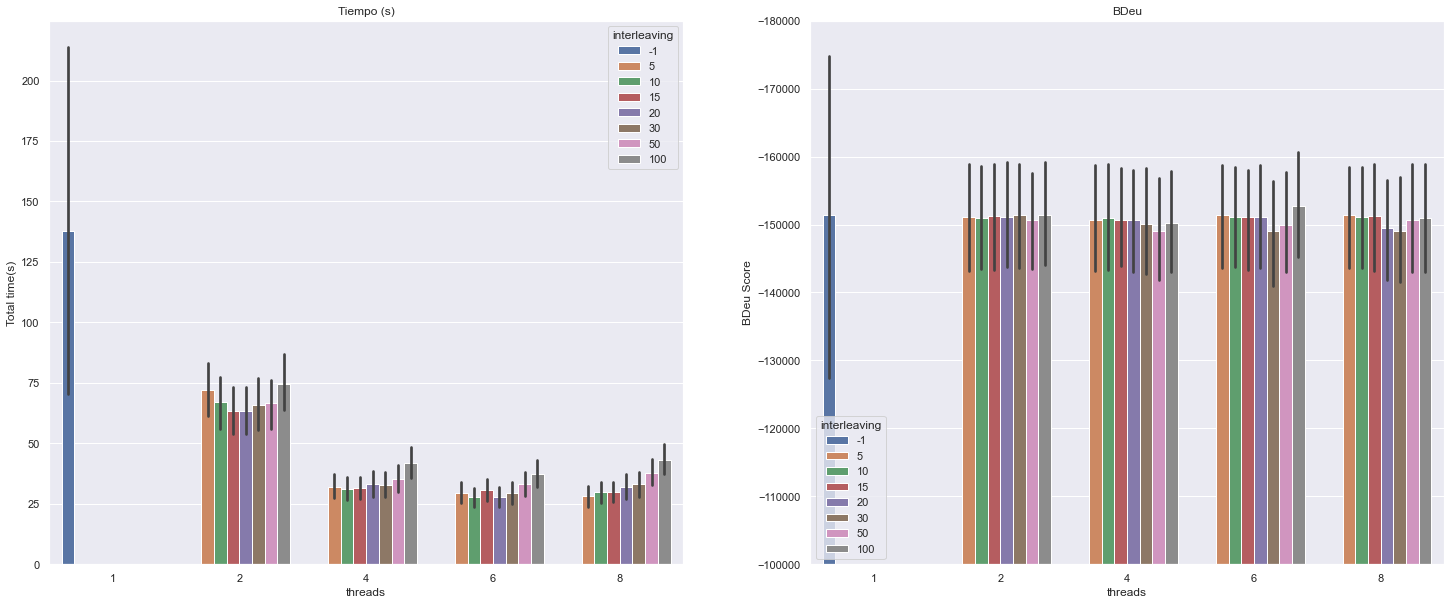

In [42]:
fig, axs = plt.subplots(ncols=2)
# use standard deviation as ci
sns.barplot(data=df, x="threads", y='Total time(s)', ax=axs[0], hue="interleaving")
#plt.ylim(-150000,-360000)
plt.ylim(-100000,-180000)
sns.barplot(data=df, x="threads", y='BDeu Score', ax=axs[1], hue="interleaving")
axs[0].set_title('Tiempo (s)')
axs[1].set_title('BDeu')

En este caso si usamos la desviación estándar obtenemos un error mucho mayor a la media, dado que es la desviación de todas las variables. Por tanto, no la mostramos:

Text(0.5, 1.0, 'BDeu')

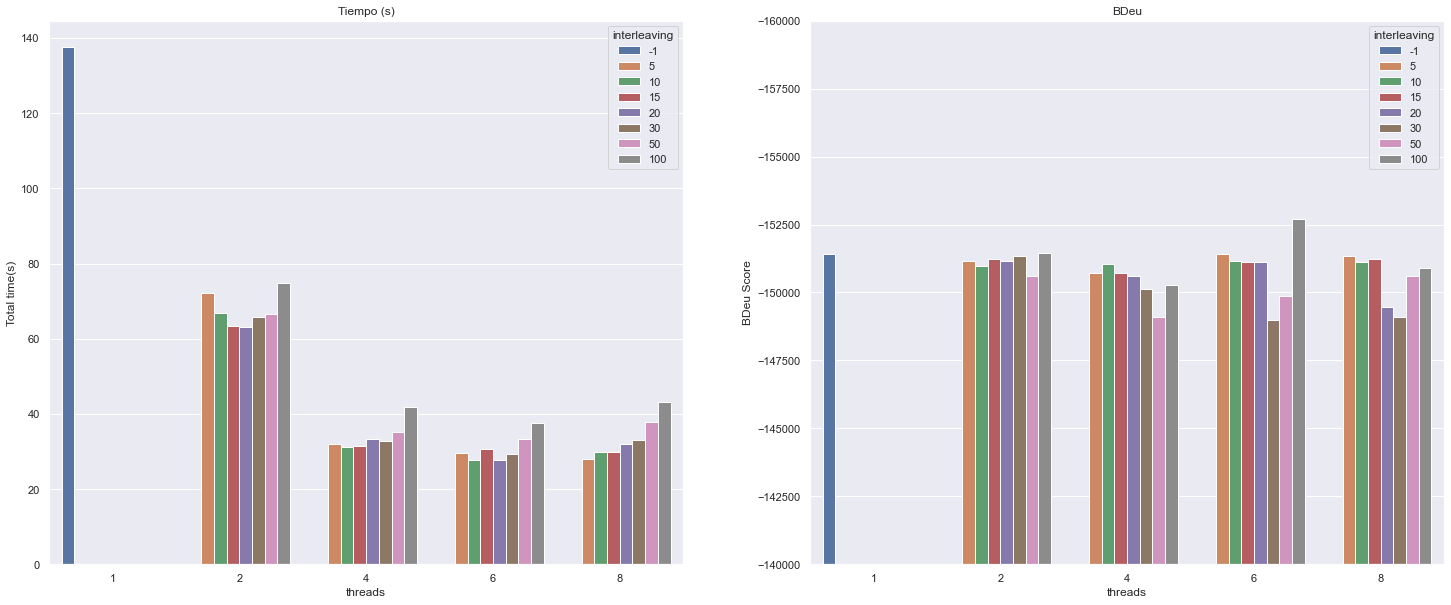

In [43]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df, x="threads", y='Total time(s)', ax=axs[0], hue="interleaving", ci=None)
#plt.ylim(-260000,-276000)
plt.ylim(-140000,-160000)
sns.barplot(data=df, x="threads", y='BDeu Score', ax=axs[1], hue="interleaving", ci=None)
axs[0].set_title('Tiempo (s)')
axs[1].set_title('BDeu')

### Tiempo de ejecución ``andes``:

In [44]:
df2 = df[df["network"] == "andes"]
df2["interleaving"] = df2["interleaving"].replace(5,"005")
df2["interleaving"] = df2["interleaving"].replace(10,"010")
df2["interleaving"] = df2["interleaving"].replace(15,"015")
df2["interleaving"] = df2["interleaving"].replace(20,"020")
df2["interleaving"] = df2["interleaving"].replace(30,"030")
df2["interleaving"] = df2["interleaving"].replace(50,"050")

df2['thread_inter'] = df2['threads'].astype(str) + '_' + df2['interleaving'].astype(str)

df2 = df2.sort_values(by=['thread_inter'])
df2

,algorithm,network,bbdd,threads,interleaving,seed,SHD,LL Score,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s),thread_inter
1331,GES_BNBuilder,andes,andes.xbif50001246_,1,-1,-1,188,-0.418554,-475749.534899,410.0,54.0,356.0,1,1485.983,1_-1
2052,GES_BNBuilder,andes,andes.xbif50006_,1,-1,-1,168,-0.419036,-475783.228369,364.0,32.0,332.0,1,1566.836,1_-1
1811,GES_BNBuilder,andes,andes.xbif50004_,1,-1,-1,178,-0.419328,-475988.874579,384.0,38.0,346.0,1,1591.042,1_-1
2172,GES_BNBuilder,andes,andes.xbif50007_,1,-1,-1,175,-0.419287,-476233.199243,378.0,20.0,358.0,1,1475.026,1_-1
2293,GES_BNBuilder,andes,andes.xbif50008_,1,-1,-1,167,-0.418340,-476089.991764,356.0,24.0,332.0,1,1489.336,1_-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20098,PGESwithStages,andes,andes.xbif50004_,8,100,17,175,-0.541168,-475116.940478,380.0,52.0,328.0,15,516.891,8_100
20099,PGESwithStages,andes,andes.xbif50004_,8,100,19,161,-0.540658,-474515.134456,344.0,24.0,320.0,14,465.025,8_100
20100,PGESwithStages,andes,andes.xbif50004_,8,100,2,170,-0.538535,-474496.751006,370.0,38.0,332.0,10,353.143,8_100
19647,PGESwithStages,andes,andes.xbif50001_,8,100,3,179,-0.535465,-476253.322270,402.0,66.0,336.0,13,477.833,8_100


Text(0.5, 1.0, 'BDeu en andes')

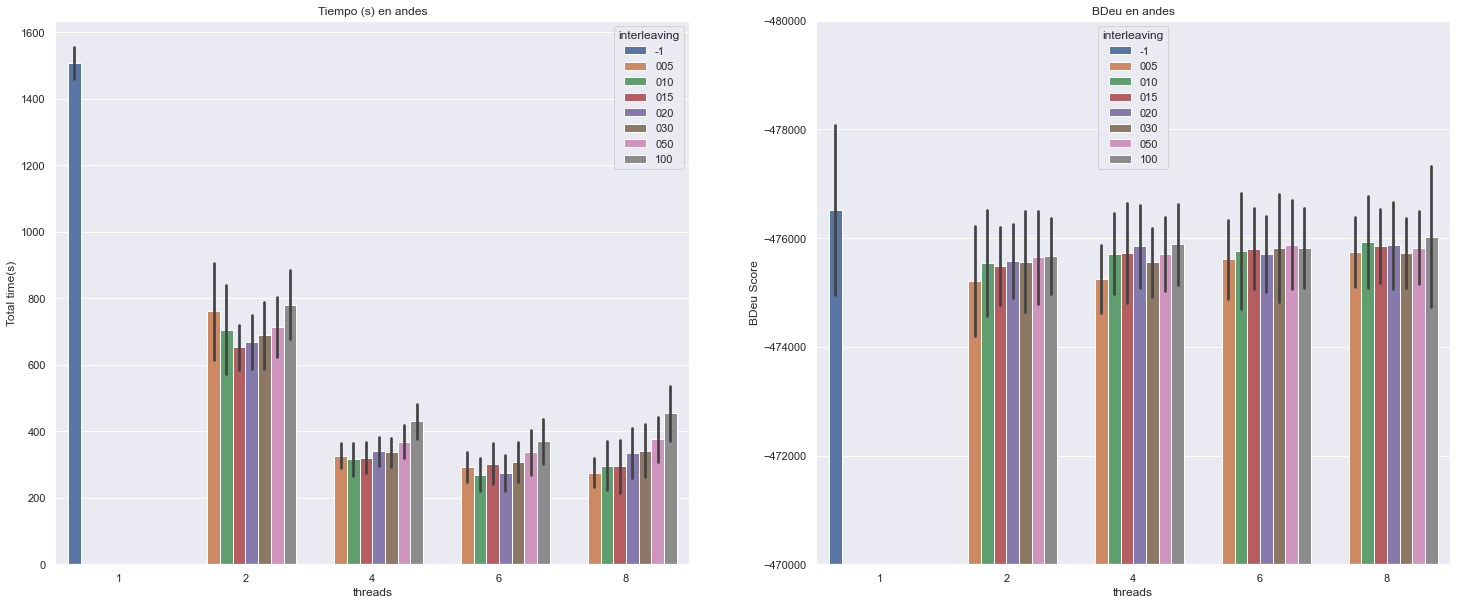

In [45]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df2, x="threads", y='Total time(s)', ax=axs[0], hue="interleaving", ci='sd')
plt.ylim(-470000,-480000)
sns.barplot(data=df2, x="threads", y='BDeu Score', ax=axs[1], hue="interleaving", ci='sd')
axs[0].set_title('Tiempo (s) en andes')
axs[1].set_title('BDeu en andes')

Text(0.5, 1.0, 'Tiempo en andes por número de hilos (1 = GES)')

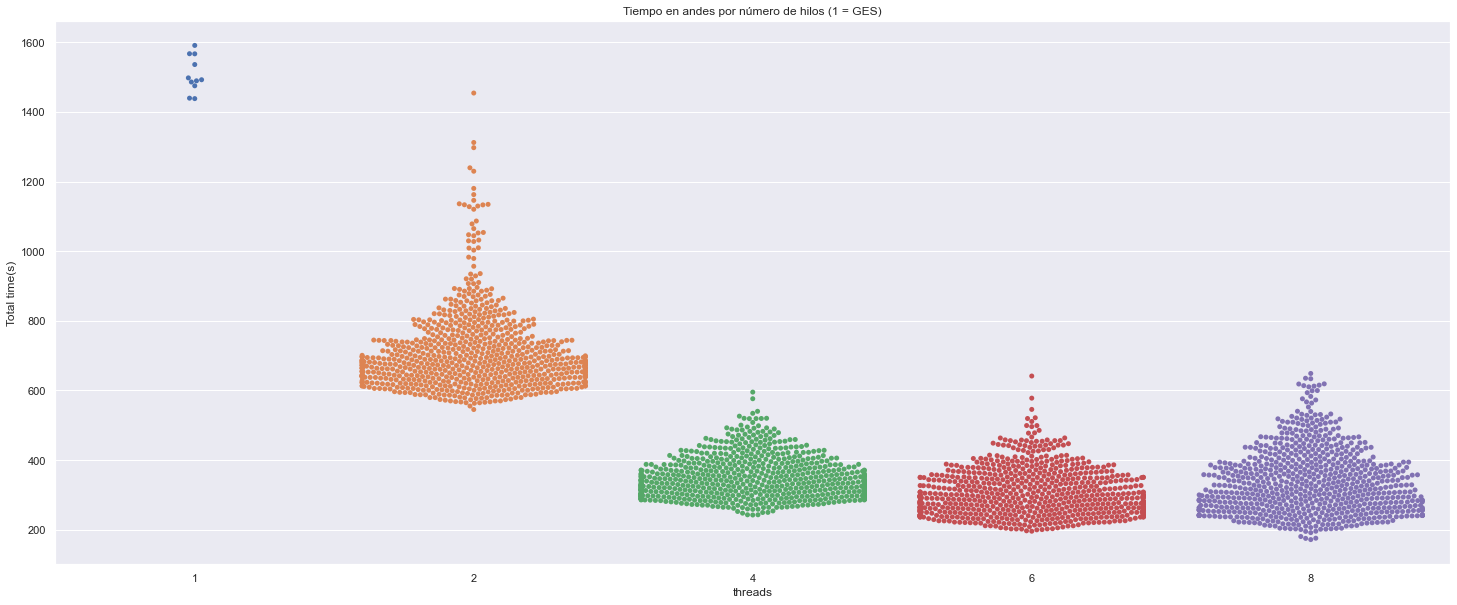

In [46]:
sns.swarmplot(data=df2, x='threads', y='Total time(s)').set_title('Tiempo en andes por número de hilos (1 = GES)')

Text(0.5, 1.0, 'Tiempo en andes por número de hilos e interleaving (1 = GES)')

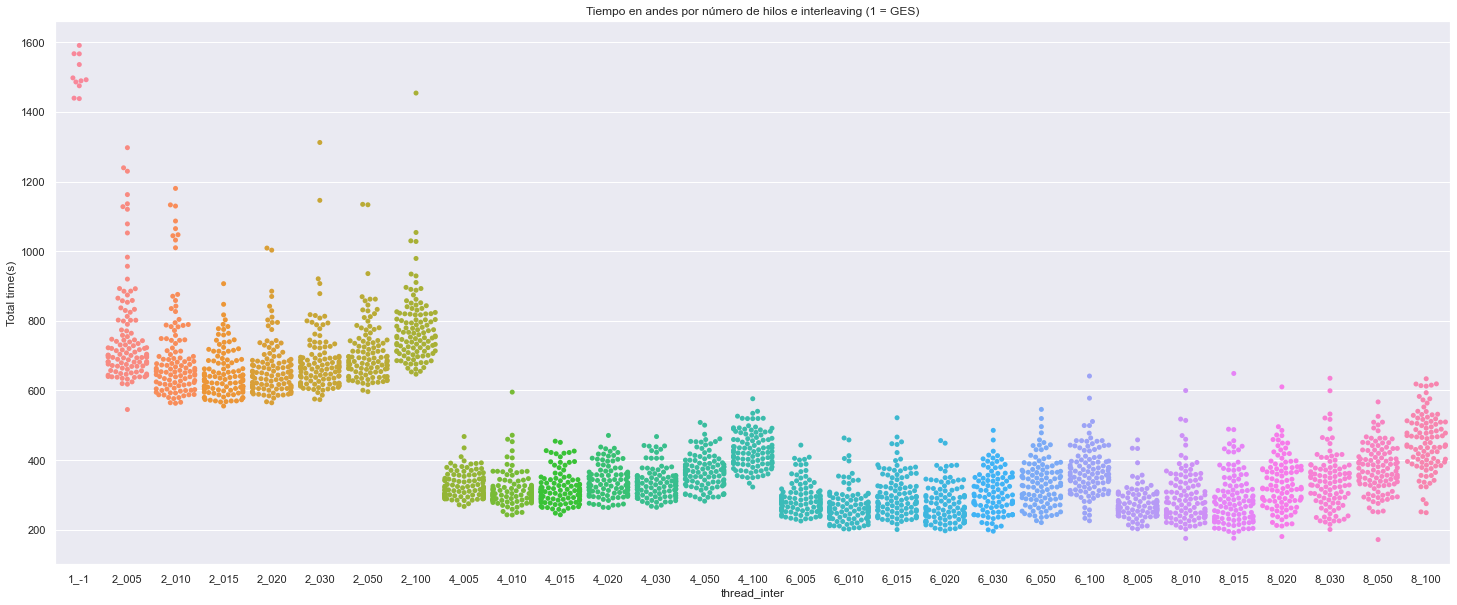

In [47]:
sns.swarmplot(data=df2, x='thread_inter', y='Total time(s)').set_title('Tiempo en andes por número de hilos e interleaving (1 = GES)')

#### BDeu:

Text(0.5, 1.0, 'BDeu en andes por número de hilos (1 = GES)')

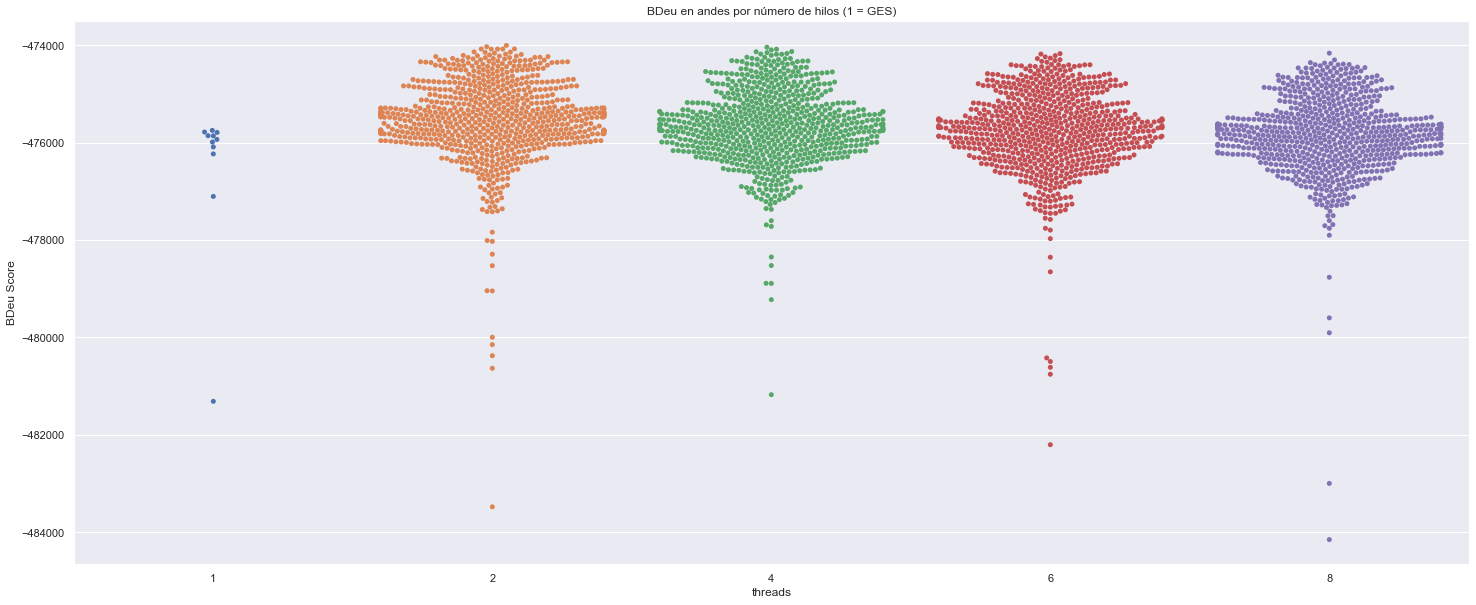

In [48]:
sns.swarmplot(data=df2, x='threads', y='BDeu Score').set_title('BDeu en andes por número de hilos (1 = GES)')

Text(0.5, 1.0, 'BDeu en andes por número de hilos e interleaving (1 = GES)')

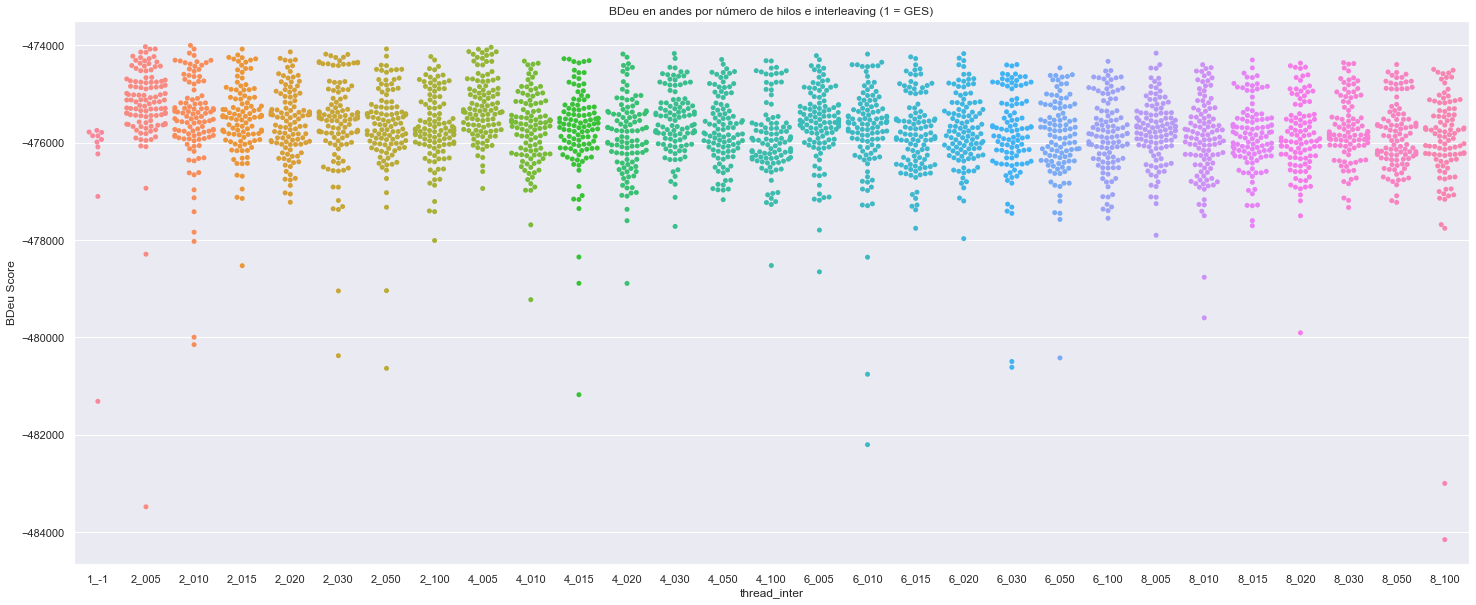

In [49]:
sns.swarmplot(data=df2, x='thread_inter', y='BDeu Score').set_title('BDeu en andes por número de hilos e interleaving (1 = GES)')

#### Nº de iteraciones

Text(0.5, 1.0, 'Iteraciones en andes por número de hilos e interleaving (1 = GES)')

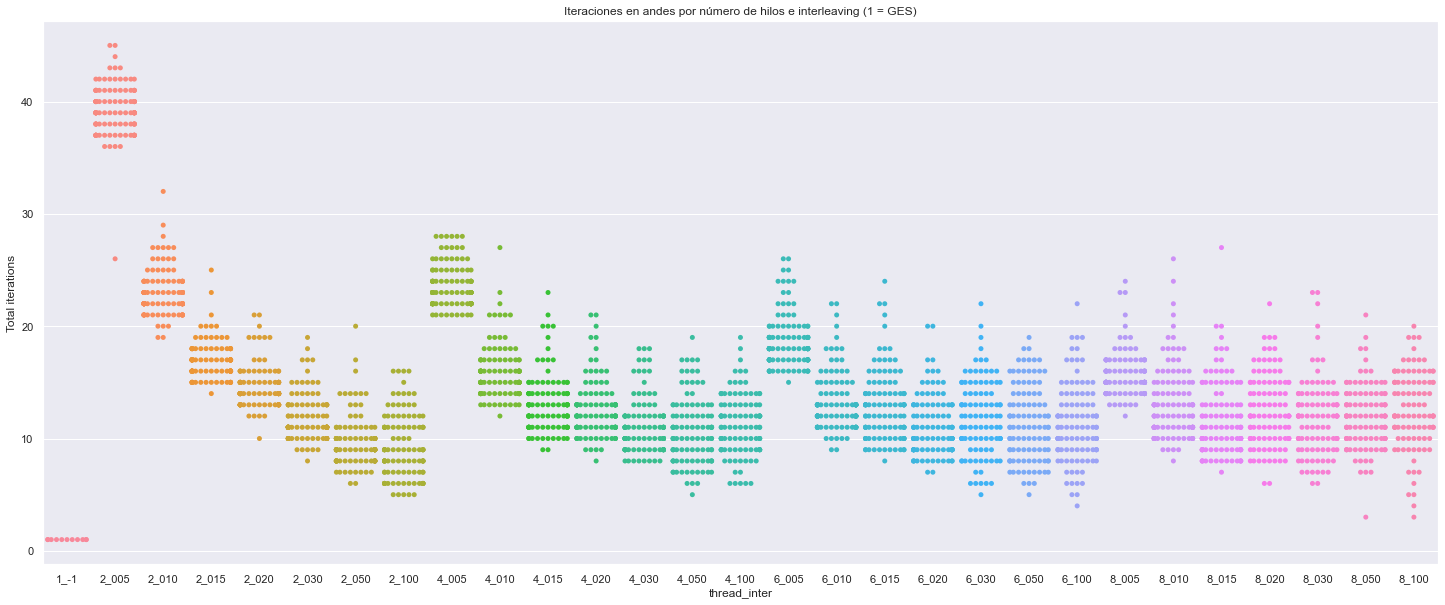

In [50]:
sns.swarmplot(data=df2, x='thread_inter', y='Total iterations').set_title('Iteraciones en andes por número de hilos e interleaving (1 = GES)')

## Particionamiento clustering

In [51]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)


### IMPORTANTE:

### BORRAR LUEGO
df_clus = df_clus[(df_clus["network"] != "cancer") & (df_clus["network"] != "earthquake")]


df_unstack = df_clus.drop(["algorithm", "bbdd", "interleaving", "seed", "SHD", "LL Score", "BDeu Score", "dfMM", "dfMM plus", "dfMM minus", "Total iterations"], axis=1)
df_unstack.groupby(["network", "threads"]).mean().unstack(0)

Total time(s)                                                        \
network         alarm       andes    barley     child hailfinder     hepar2   
threads                                                                       
2            4.347182  614.780636  8.329974  1.613519   9.766377  10.651000   
4            3.489429  304.987368  3.899299  1.594740   6.577468   6.982377   
6            3.426922  279.625297  3.857870  1.612312   5.343182   5.781078   
8            4.400013  299.257618  4.156870  1.930519   7.285247   6.805649   

                                                  
network insurance    mildew     water   win95pts  
threads                                           
2        2.834273  2.728039  1.962156  44.117818  
4        2.618247  2.340104  1.526065  28.916813  
6        2.244675  1.797636  1.514766  27.310039  
8        2.623922  1.556468  1.618364  31.158078

In [52]:
df_unstack.groupby(["network", "threads"]).count().unstack(0)

Total time(s)                                                        \
network         alarm andes barley child hailfinder hepar2 insurance mildew   
threads                                                                       
2                  77    77     77    77         77     77        77     77   
4                  77    76     77    77         77     77        77     77   
6                  77    74     77    77         77     77        77     77   
8                  77    76     77    77         77     77        77     77   

                        
network water win95pts  
threads                 
2          77       77  
4          77       75  
6          77       76  
8          77       77

In [53]:
df_clus.groupby(["threads","interleaving"], observed=True).mean().drop(["seed"],axis=1)

SHD  LL Score     BDeu Score        dfMM  \
threads interleaving                                                   
2       5             73.236364       0.0 -180183.599334  172.690909   
        10            72.463636       0.0 -180227.490494  171.327273   
        15            70.927273       0.0 -180133.248824  168.400000   
        20            70.390909       0.0 -180125.109999  166.727273   
        30            71.127273       0.0 -180174.052798  169.218182   
        50            70.890909       0.0 -180144.568386  168.563636   
        100           71.081818       0.0 -180153.141095  168.854545   
4       5             71.284404       0.0 -181408.340069  168.954128   
        10            71.872727       0.0 -180244.954238  170.945455   
        15            70.321101       0.0 -177429.627671  167.394495   
        20            71.727273       0.0 -180193.398763  170.236364   
        30            71.254545       0.0 -180179.967010  169.563636   
        50            70.752294       0.0 -181352.570599  168.678899   
        100           71.863636       0.0 -180205.280305  170.309091   
6       5             71.527273       0.0 -180248.600505  169.709091   
        10            70.752294       0.0 -177498.970729  168.128440   
        15            70.825688       0.0 -181394.687903  168.000000   
        20            71.481818       0.0 -180199.858384  169.981818   
        30            71.809091       0.0 -180188.329676  170.472727   
        50            70.394495       0.0 -177480.494087  167.284404   
        100           71.018349       0.0 -177503.220508  169.009174   
8       5             72.590909       0.0 -180383.479855  171.763636   
        10            71.681818       0.0 -180204.949886  170.181818   
        15            72.627273       0.0 -180282.532387  172.200000   
        20            71.836364       0.0 -180196.098039  170.472727   
        30            71.818182       0.0 -180192.912143  170.854545   
        50            70.917431       0.0 -177510.774547  168.752294   
        100           71.918182       0.0 -180204.741045  170.909091   

                      dfMM plus  dfMM minus  Total iterations  Total time(s)  
threads interleaving                                                          
2       5             17.127273  155.563636         11.290909      81.407800  
        10            18.745455  152.581818          7.145455      70.370473  
        15            18.872727  149.527273          5.836364      70.131173  
        20            17.781818  148.945455          5.081818      65.012227  
        30            19.472727  149.745455          4.627273      68.234418  
        50            18.963636  149.600000          4.072727      65.802155  
        100           19.036364  149.818182          3.854545      69.833436  
4       5             17.247706  151.706422          8.100917      39.839872  
        10            20.636364  150.309091          5.854545      36.698900  
        15            19.431193  147.963303          4.981651      32.475853  
        20            19.709091  150.527273          4.845455      34.376364  
        30            19.781818  149.781818          4.436364      33.913327  
        50            19.119266  149.559633          4.174312      32.448651  
        100           20.036364  150.272727          4.372727      41.953400  
6       5             18.672727  151.036364          6.963636      34.290582  
        10            19.009174  149.119266          5.027523      29.561358  
        15            18.660550  149.339450          4.834862      31.800037  
        20            19.836364  150.145455          4.536364      31.328827  
        30            19.963636  150.509091          4.290909      29.407827  
        50            18.697248  148.587156          4.247706      31.696954  
        100           20.440367  148.568807          4.357798      37.991000  
8       5             19.872727  151.890909       

In [54]:
df_clus.groupby(["threads","interleaving"], observed=True).std().drop(["seed"],axis=1)

SHD  LL Score     BDeu Score        dfMM  \
threads interleaving                                                   
2       5             53.317971       0.0  139381.521019  122.440155   
        10            51.629534       0.0  139355.715141  120.114709   
        15            48.336115       0.0  139333.113499  114.368084   
        20            47.251444       0.0  139295.509902  112.010723   
        30            47.907041       0.0  139323.924334  114.507031   
        50            47.635147       0.0  139318.069781  113.793353   
        100           48.274280       0.0  139355.283660  114.810241   
4       5             50.708698       0.0  139511.861525  118.402827   
        10            49.249246       0.0  139388.385036  116.669284   
        15            47.941299       0.0  137056.964200  114.641956   
        20            48.972359       0.0  139312.122149  116.079609   
        30            47.973318       0.0  139305.446603  115.127494   
        50            47.933626       0.0  139374.104416  115.356844   
        100           49.855659       0.0  139411.959310  118.076071   
6       5             48.512499       0.0  139335.048461  113.997211   
        10            47.511238       0.0  137084.564808  112.540125   
        15            48.296891       0.0  139429.441598  114.736413   
        20            48.040834       0.0  139334.852850  115.093100   
        30            48.822745       0.0  139299.077141  116.202584   
        50            47.628582       0.0  137021.185115  113.866564   
        100           49.057031       0.0  137092.804057  117.350890   
8       5             49.530696       0.0  139393.401281  116.453001   
        10            48.518025       0.0  139359.753678  114.065343   
        15            50.409308       0.0  139499.151279  118.777859   
        20            48.106443       0.0  139299.848727  114.661025   
        30            49.049719       0.0  139300.826422  117.292220   
        50            48.693890       0.0  137094.273521  116.643740   
        100           49.492865       0.0  139363.656230  118.138975   

                      dfMM plus  dfMM minus  Total iterations  Total time(s)  
threads interleaving                                                          
2       5             20.292408  116.969496          8.961022     217.861878  
        10            21.388257  111.927678          4.861072     186.620328  
        15            22.641242  104.907098          3.865935     185.240992  
        20            21.114533  104.225130          2.796235     170.748272  
        30            25.268724  104.021561          2.808438     179.391319  
        50            23.140150  104.325109          2.039559     169.614622  
        100           22.868963  104.870928          1.549409     177.837579  
4       5             20.260871  111.644550          5.254531     102.540693  
        10            24.596460  106.323096          3.176278      95.425443  
        15            23.346174  103.792165          2.808656      85.731759  
        20            23.852508  105.766812          2.577910      87.892855  
        30            24.151427  104.153150          2.421340      84.913026  
        50            23.548895  104.894782          1.783899      77.758123  
        100           24.203998  106.718004          2.212803     106.153406  
6       5             20.973163  107.185762          4.097274      87.698040  
        10            21.965670  104.244169          2.932761      81.073705  
        15            22.780848  105.135206          2.713184      82.236085  
        20            24.248154  104.868886          2.632462      79.981061  
        30            26.152667  105.445646          2.185631      72.079766  
        50            22.902978  104.385433          2.165196      80.636482  
        100           26.379506  104.570052          2.640577      99.762310  
8       5             23.502922  108.221939       

Text(0.5, 1.0, 'BDeu')

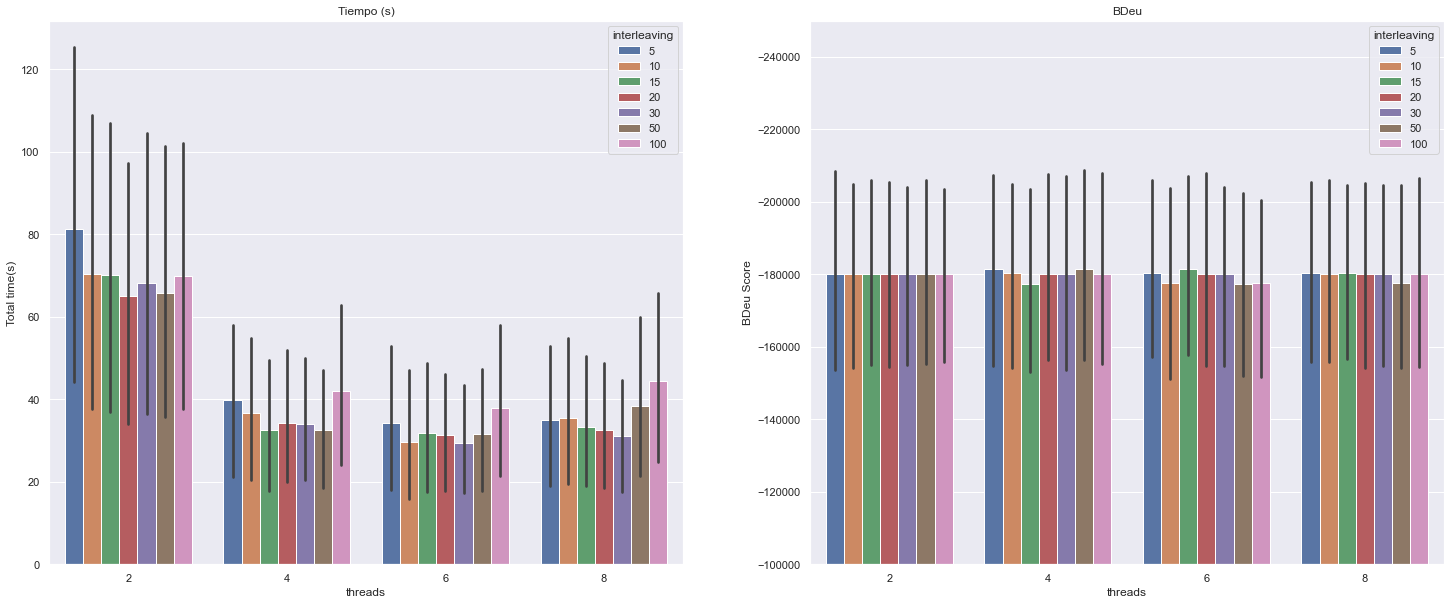

In [68]:
fig, axs = plt.subplots(ncols=2)
# use standard deviation as ci
sns.barplot(data=df_clus, x="threads", y='Total time(s)', ax=axs[0], hue="interleaving")
#plt.ylim(-150000,-360000)
plt.ylim(-100000,-250000)
sns.barplot(data=df_clus, x="threads", y='BDeu Score', ax=axs[1], hue="interleaving")
axs[0].set_title('Tiempo (s)')
axs[1].set_title('BDeu')

Text(0.5, 1.0, 'BDeu')

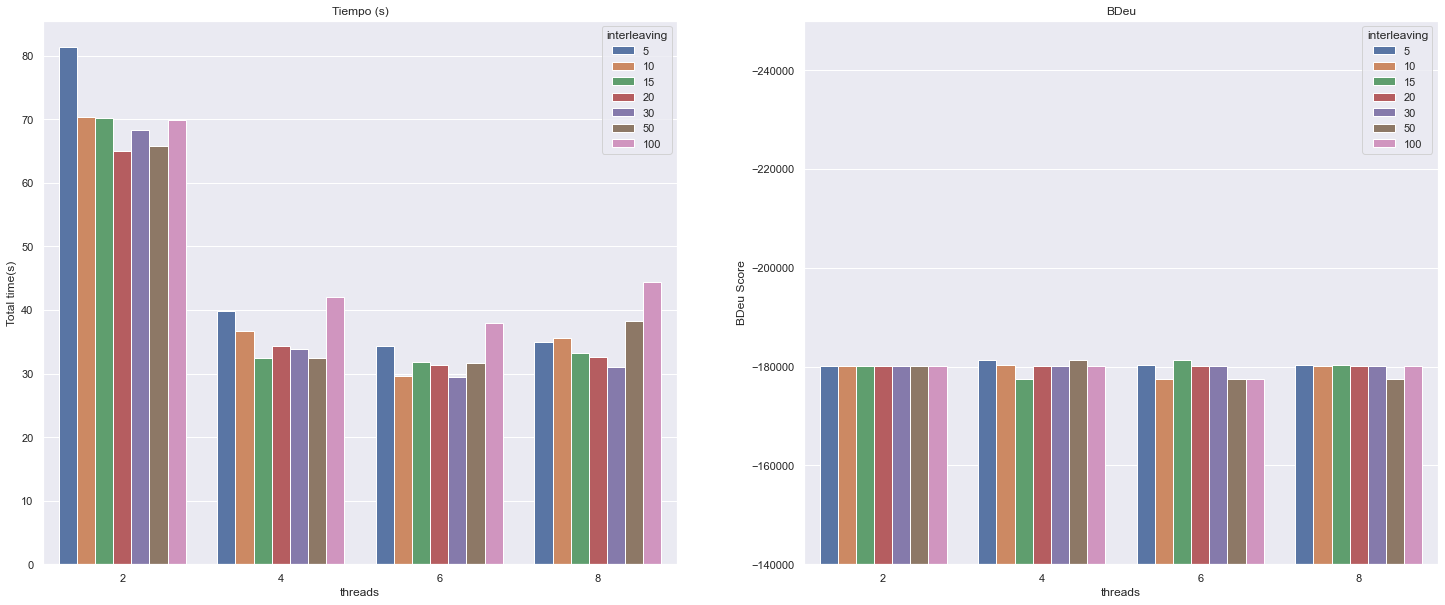

In [69]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=df_clus, x="threads", y='Total time(s)', ax=axs[0], hue="interleaving", ci=None)
#plt.ylim(-260000,-276000)
plt.ylim(-140000,-250000)
sns.barplot(data=df_clus, x="threads", y='BDeu Score', ax=axs[1], hue="interleaving", ci=None)
axs[0].set_title('Tiempo (s)')
axs[1].set_title('BDeu')

In [70]:
df["algorithm"] = df["algorithm"].replace("PGESwithStages","pges")
df["algorithm"] = df["algorithm"].replace("GES_BNBuilder","ges")
df_clus["algorithm"] = df_clus["algorithm"].replace("pges","pges_cluster")

In [71]:
df_all = df.append(df_clus)
df_all

,algorithm,network,bbdd,threads,interleaving,seed,SHD,LL Score,BDeu Score,dfMM,dfMM plus,dfMM minus,Total iterations,Total time(s)
0,ges,alarm,alarm.xbif50001246_,1,-1,-1,20,-0.286967,-57646.025031,46.0,12.0,34.0,1,7.064
1,pges,alarm,alarm.xbif50001246_,2,10,11,18,-0.500475,-57044.771012,42.0,10.0,32.0,5,5.224
2,pges,alarm,alarm.xbif50001246_,2,10,13,17,-0.377120,-57132.277361,46.0,14.0,32.0,6,5.982
3,pges,alarm,alarm.xbif50001246_,2,10,17,18,-0.499314,-57070.092644,42.0,10.0,32.0,5,5.128
4,pges,alarm,alarm.xbif50001246_,2,10,19,16,-0.379259,-57066.175171,42.0,10.0,32.0,6,5.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,pges_clustering,win95pts,win95pts.xbif_,8,15,2,125,0.000000,-50118.458501,282.0,88.0,194.0,5,23.096
3376,pges_clustering,win95pts,win95pts.xbif_,8,20,2,119,0.000000,-49968.609215,268.0,78.0,190.0,6,34.593
3377,pges_clustering,win95pts,win95pts.xbif_,8,30,2,112,0.000000,-49802.985501,260.0,90.0,170.0,8,41.029
3378,pges_clustering,win95pts,win95pts.xbif_,8,50,2,107,0.000000,-49787.994175,242.0,78.0,164.0,5,48.888


### Nos quedamos solo con andes

In [72]:
df_all = df_all[df_all["network"] == "andes"]

df_all["interleaving"] = df_all["interleaving"].replace(5,"005")
df_all["interleaving"] = df_all["interleaving"].replace(10,"010")
df_all["interleaving"] = df_all["interleaving"].replace(15,"015")
df_all["interleaving"] = df_all["interleaving"].replace(20,"020")
df_all["interleaving"] = df_all["interleaving"].replace(30,"030")
df_all["interleaving"] = df_all["interleaving"].replace(50,"050")

df_all['alg_inter'] = df_all['algorithm'].astype(str) + '_' + df_all['interleaving'].astype(str)

df_all = df_all.sort_values(by=['alg_inter'])

In [73]:
colors = ['dimgrey'] + ['skyblue',  'deepskyblue','dodgerblue','cornflowerblue','c','mediumaquamarine','mediumseagreen',  'sandybrown','salmon','red','crimson','firebrick','sienna','saddlebrown'] *4

Text(0.5, 1.0, 'Tiempo en andes por número de hilos e interleaving (1 = GES)')

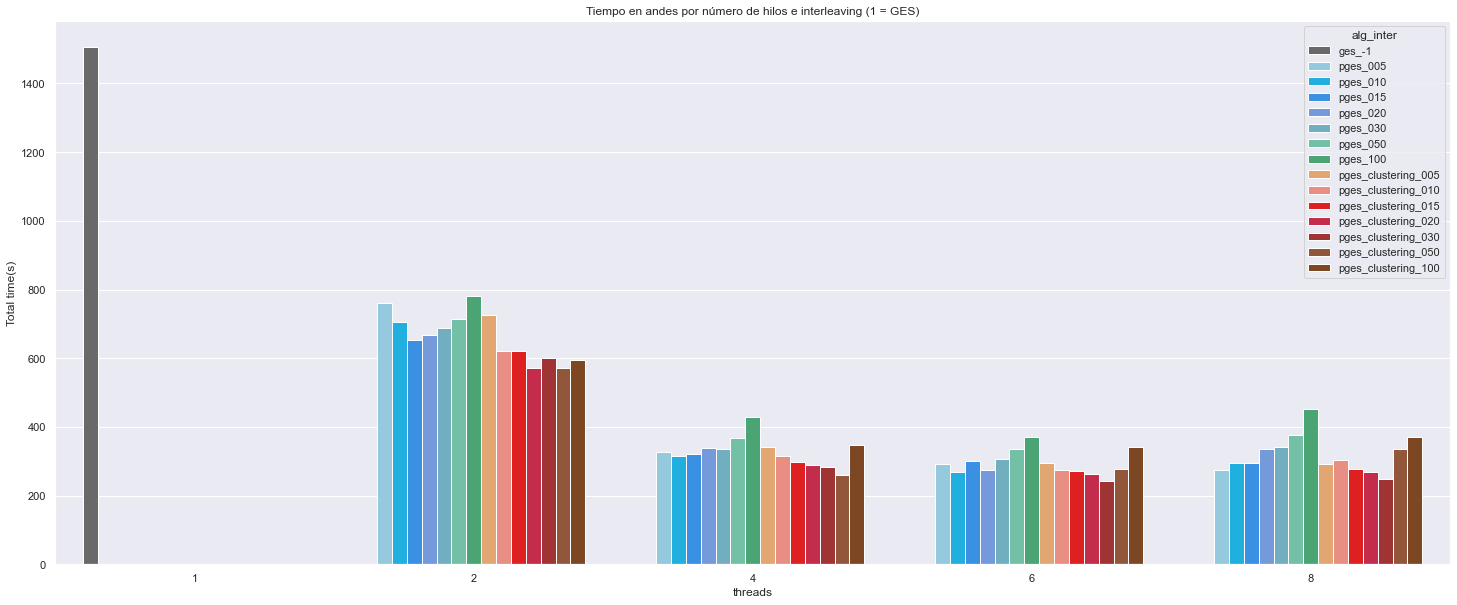

In [74]:
sns.barplot(data=df_all, x="threads", y='Total time(s)', hue="alg_inter", ci=None, palette=colors).set_title('Tiempo en andes por número de hilos e interleaving (1 = GES)')

Text(0.5, 1.0, 'BDeu en andes por número de hilos e interleaving (1 = GES)')

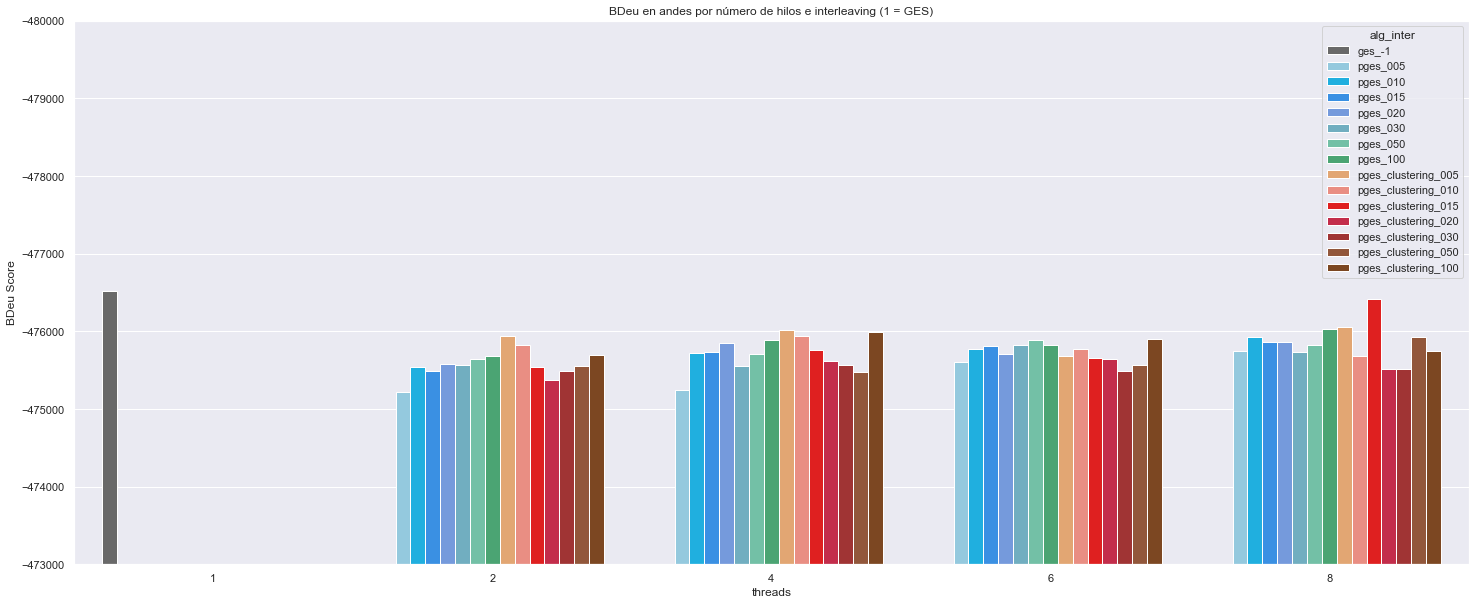

In [75]:
plt.ylim(-473000,-480000)
sns.barplot(data=df_all, x="threads", y='BDeu Score', hue="alg_inter", ci=None, palette=colors).set_title('BDeu en andes por número de hilos e interleaving (1 = GES)')

In [76]:
['b'] * 3

['b', 'b', 'b']

Text(0.5, 1.0, 'Iteraciones en andes por número de hilos e interleaving (1 = GES)')

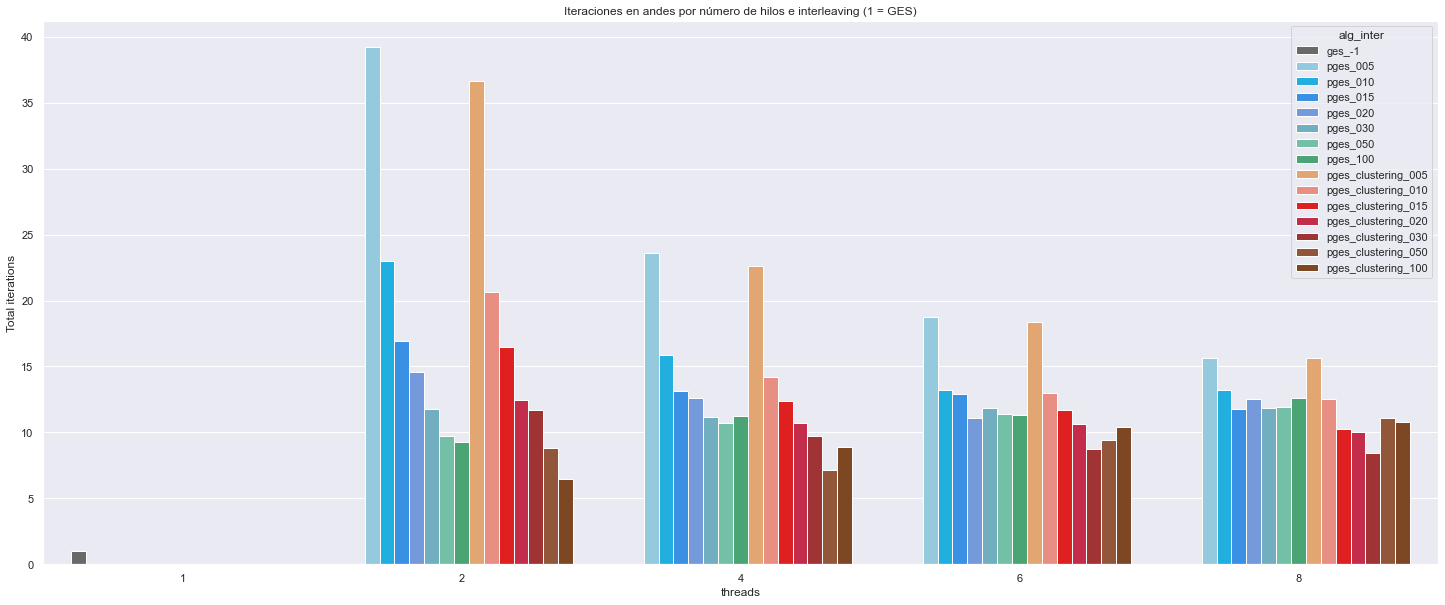

In [77]:
sns.barplot(data=df_all, x="threads", y='Total iterations', hue="alg_inter", ci=None, palette=colors).set_title('Iteraciones en andes por número de hilos e interleaving (1 = GES)')

Text(0.5, 1.0, 'Tiempo en andes con 8 hilos por interleaving (1 = GES)')

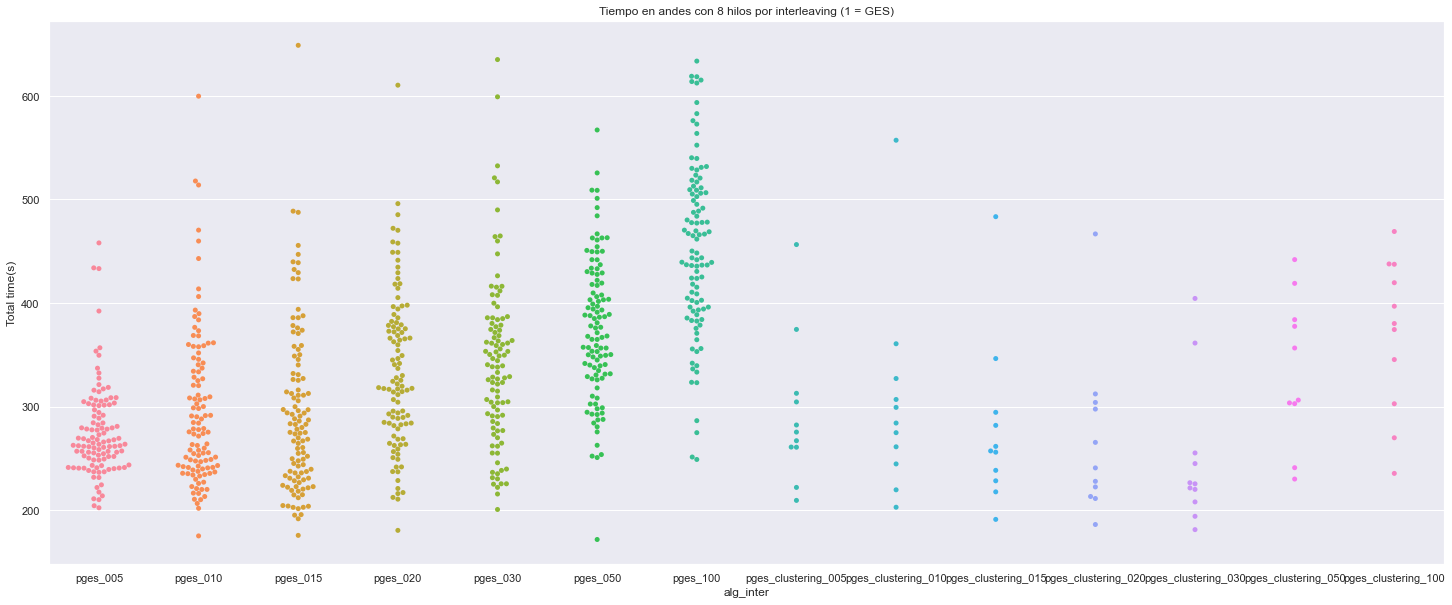

In [78]:
sns.swarmplot(data=df_all[(df_all["threads"] == 8) | (df_all["threads"] == -1)], x='alg_inter', y='Total time(s)').set_title('Tiempo en andes con 8 hilos por interleaving (1 = GES)')

Text(0.5, 1.0, 'BDeu en andes con 8 hilos por interleaving (1 = GES)')

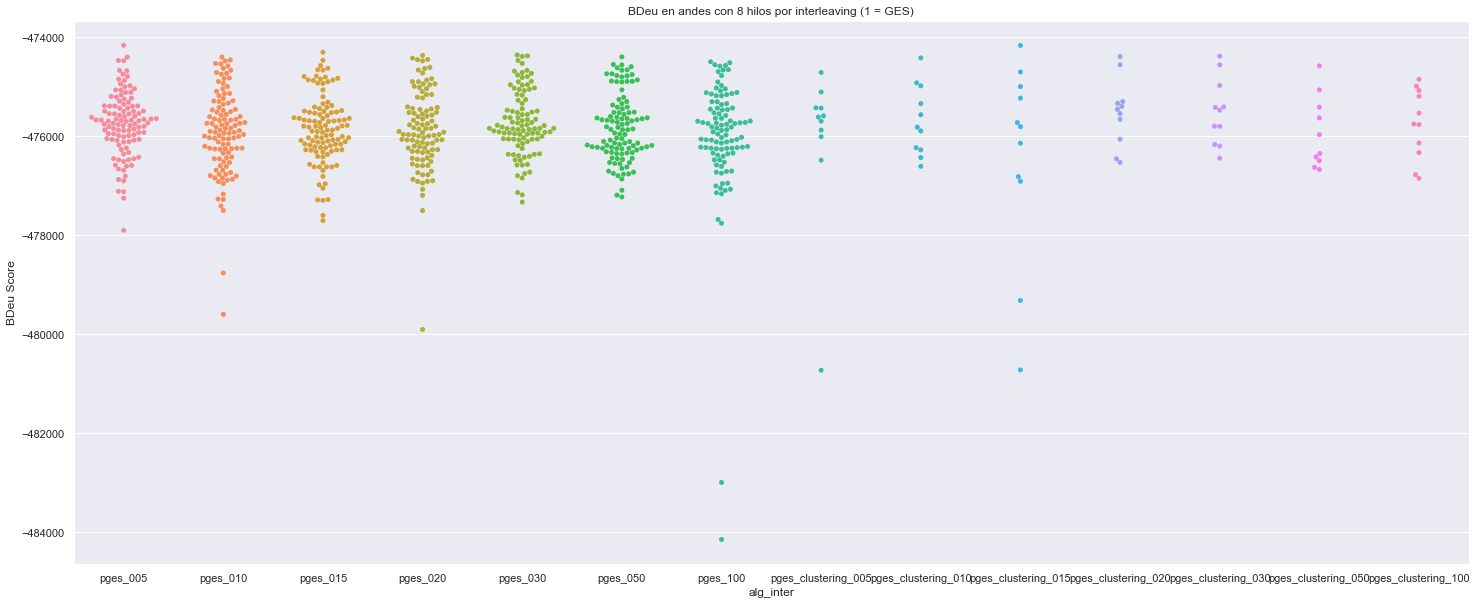

In [79]:
sns.swarmplot(data=df_all[(df_all["threads"] == 8) | (df_all["threads"] == -1)], x='alg_inter', y='BDeu Score').set_title('BDeu en andes con 8 hilos por interleaving (1 = GES)')